In [1]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_data_file_name = 'train_data.csv'
test_data_file_name = 'test_data.csv'

train_data = pd.read_csv(train_data_file_name)
test_data = pd.read_csv(test_data_file_name)

train_data.drop(['Date', 'Volume'], axis=1, inplace=True)
train_data['CPI'] = train_data['Close Price'] - train_data['Close Price'].shift(1)
train_data['CPI'].iloc[0] = 0
train_data['CPI'] = pd.Series(map(lambda x: 1 if x > 0 else 0, train_data['CPI']))



test_data.drop(['Date', 'Volume'], axis=1, inplace=True)
test_data['CPI'] = test_data['Close Price'] - test_data['Close Price'].shift(1)
test_data['CPI'].iloc[0] = 0
test_data['CPI'] = pd.Series(map(lambda x: 1 if x > 0 else 0, test_data['CPI']))

train_data.head()

,Open Price,Close Price,High Price,Low Price,CPI
0,902.99,931.80,934.73,899.35,0
1,929.17,927.45,936.63,919.53,0
2,931.17,934.70,943.85,927.28,1
3,927.45,906.65,927.45,902.37,0
4,905.73,909.73,910.00,896.81,1


In [3]:
train_data.CPI.value_counts()

1    1236
0    1028
Name: CPI, dtype: int64

In [4]:
def get_splits(train_data, test_data):
#     np.random.seed(42)
#     random.seed(42)
#     train, test = model_selection.train_test_split(data)
    x_train = train_data.loc[:, train_data.columns != 'CPI']
    y_train = train_data['CPI']
    x_test = test_data.loc[:, test_data.columns != 'CPI']
    y_test = test_data['CPI']
    return x_train, y_train, x_test, y_test

In [5]:
x_train, y_train, x_test, y_test = get_splits(train_data, test_data)
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [131]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'sigmoid'  # activation function for hidden layer
l2 = 0.01          # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 10          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update
loss='binary_crossentropy'
optimizer='rmsprop'

In [132]:
class_weight = {
    0: 1028/1236,
    1: 1.
}

In [133]:
# CREATING, AND COMPILING THE MODEL

def build_model(hidden_units, activation, learning_rate, loss, optimizer):
    model = models.Sequential()
    model.add(layers.Dense(input_shape=(4,),
                           units=hidden_units, 
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=1,
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(
                  loss=loss,
                  # Adam is a kind of gradient descent
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = build_model(hidden_units, activation, learning_rate, loss, optimizer)

Train on 1811 samples, validate on 453 samples
Epoch 1/10
 - 1s - loss: 0.9155 - acc: 0.4544 - val_loss: 0.8493 - val_acc: 0.4525
Epoch 2/10
 - 0s - loss: 0.7979 - acc: 0.4544 - val_loss: 0.7540 - val_acc: 0.4525
Epoch 3/10
 - 0s - loss: 0.7222 - acc: 0.4544 - val_loss: 0.6956 - val_acc: 0.4525
Epoch 4/10
 - 0s - loss: 0.6767 - acc: 0.5058 - val_loss: 0.6627 - val_acc: 0.5475
Epoch 5/10
 - 0s - loss: 0.6560 - acc: 0.5456 - val_loss: 0.6497 - val_acc: 0.5475
Epoch 6/10
 - 0s - loss: 0.6469 - acc: 0.5456 - val_loss: 0.6435 - val_acc: 0.5475
Epoch 7/10
 - 0s - loss: 0.6418 - acc: 0.5456 - val_loss: 0.6391 - val_acc: 0.5475
Epoch 8/10
 - 0s - loss: 0.6382 - acc: 0.5456 - val_loss: 0.6361 - val_acc: 0.5475
Epoch 9/10
 - 0s - loss: 0.6356 - acc: 0.5456 - val_loss: 0.6339 - val_acc: 0.5475
Epoch 10/10
 - 0s - loss: 0.6337 - acc: 0.5456 - val_loss: 0.6323 - val_acc: 0.5475
2264/2264 [==============================] - 0s 38us/step
Training accuracy: 0.5459363958650258
Testing accuracy: 0.519841

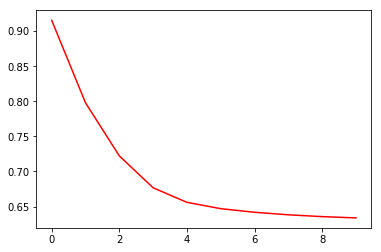

In [134]:
# FITTING THE MODEL

history = model.fit(
    x_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    class_weight=class_weight, 
    verbose=2,
    shuffle=True,
    validation_split=0.2,
    )

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=batch_size)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [102]:
prediction = model.predict_classes(
                 x_test,
                 batch_size=batch_size)
print(prediction)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
